In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
import pickle
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [9]:
house=pd.read_csv('/content/drive/MyDrive/data/ML/home_data.csv')

In [10]:

house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [12]:
print(house.isnull().any())
# Inspecting type
print(house.dtypes)

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_

In [13]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'price of a house')

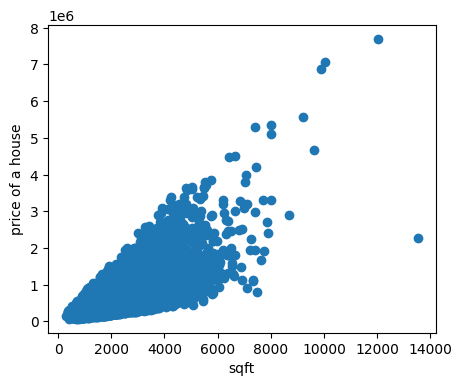

In [16]:
plt.figure(figsize=(5,4))
plt.scatter(house.sqft_living,house.price)
plt.xlabel('sqft')
plt.ylabel('price of a house')

<Axes: >

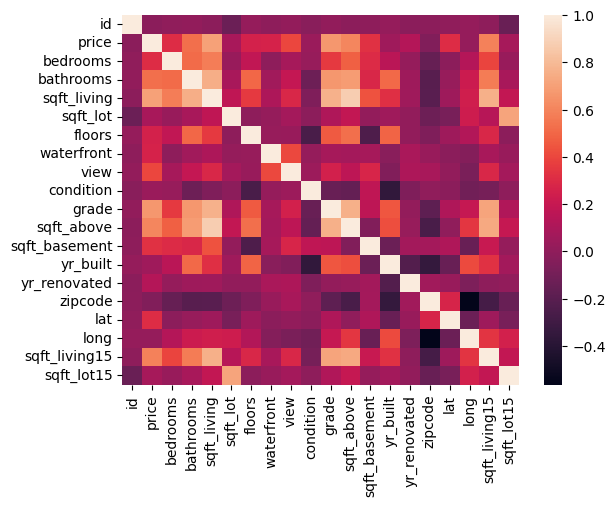

In [20]:
#corr -correlation matrix
sns.heatmap(house.corr())

<Axes: title={'center': 'Pearson Correlation of features'}>

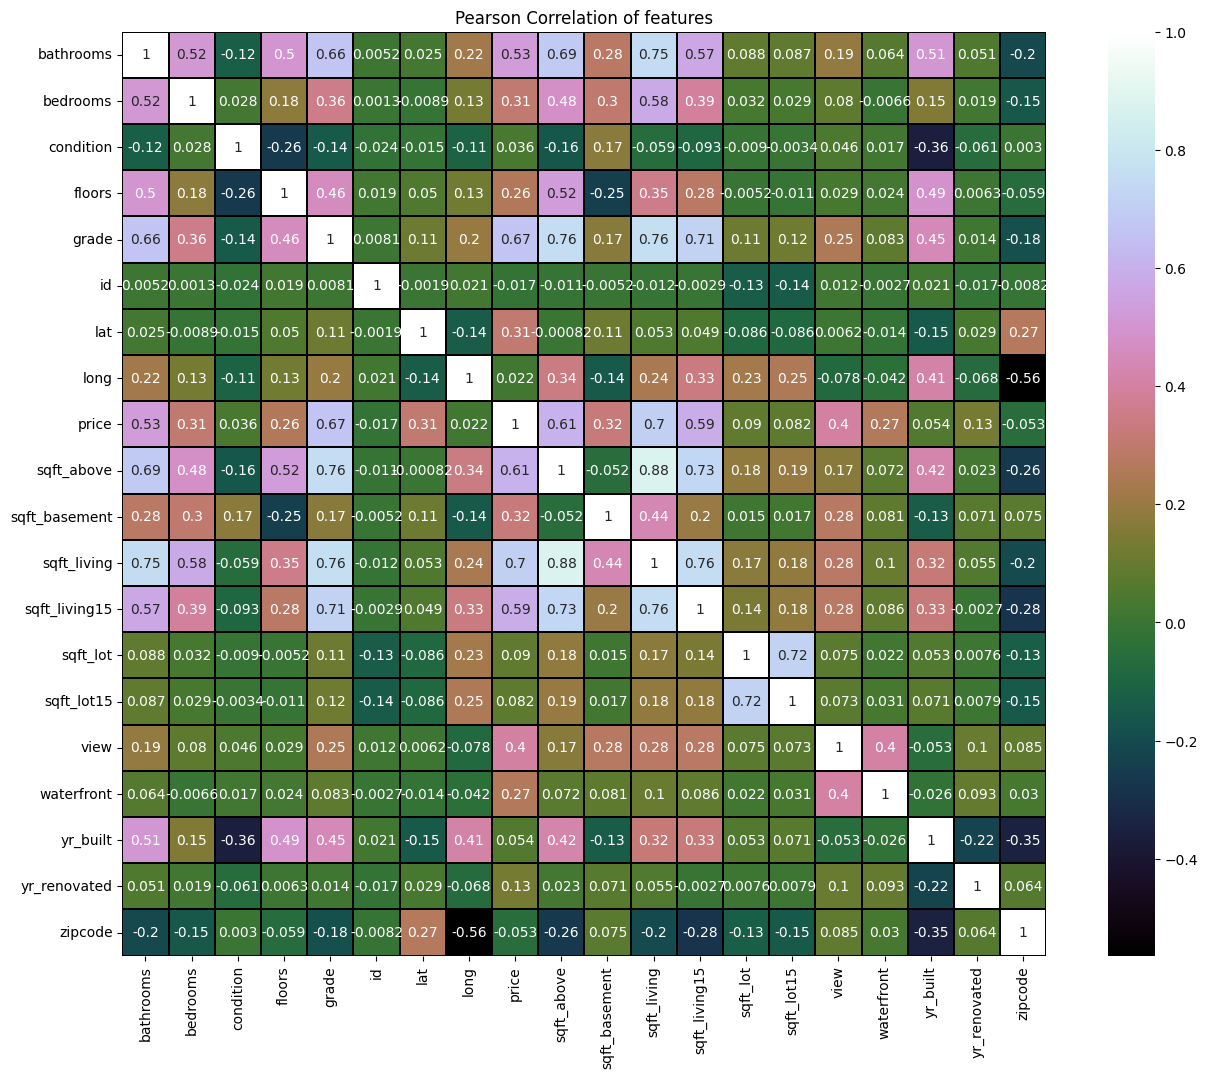

In [21]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in house.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion
num_list = house.columns.difference(str_list)
# Create Dataframe containing only numerical features
house_num = house[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)


<Axes: xlabel='price', ylabel='Density'>

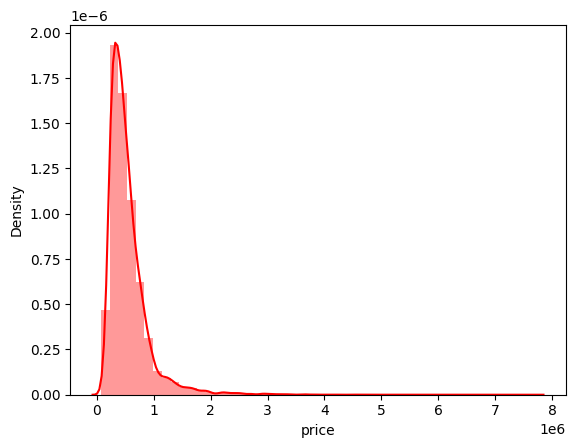

In [22]:
#distribution plot
sns.distplot(house['price'],color='red')

<Axes: xlabel='zipcode', ylabel='price'>

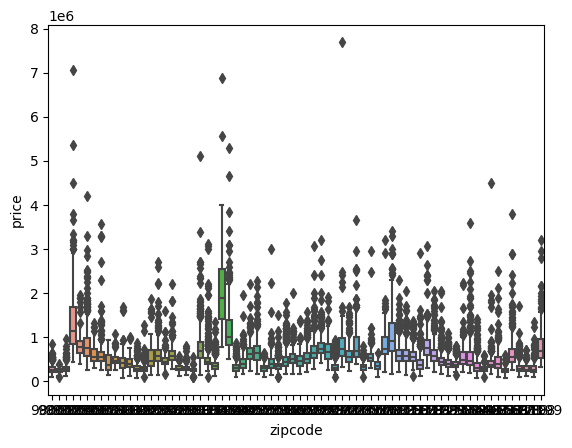

In [24]:
sns.boxplot(x='zipcode',y='price',data=house)

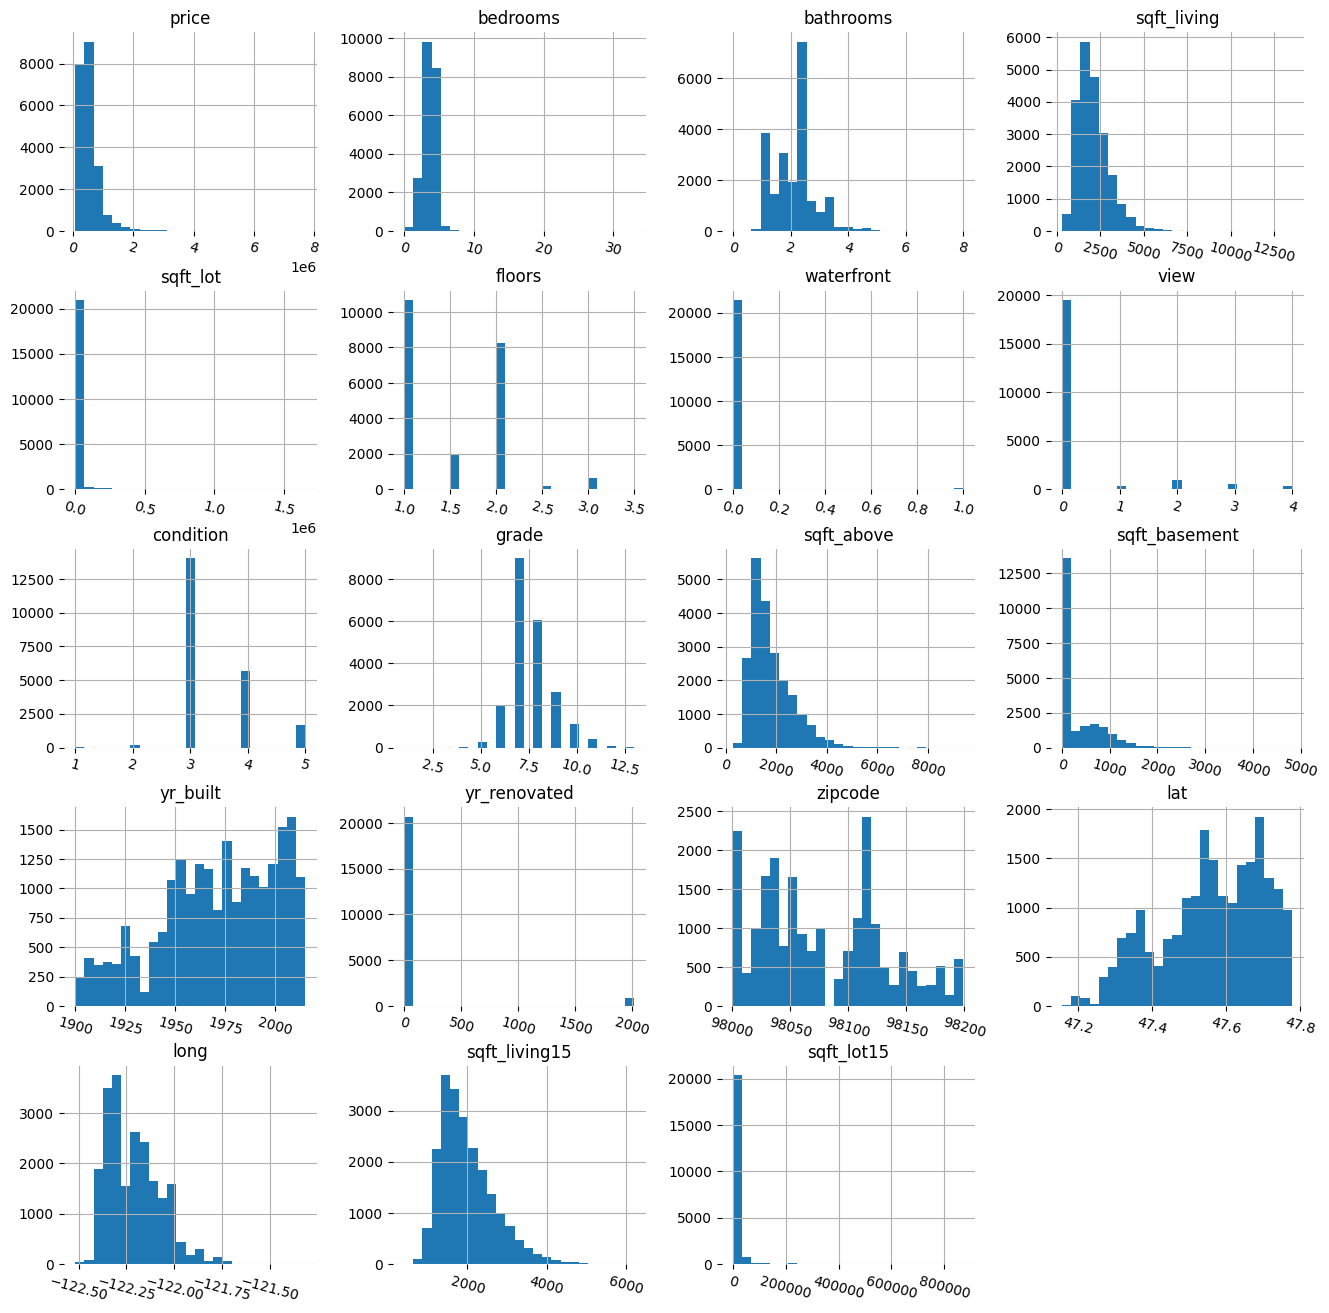

In [25]:
df1=house[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

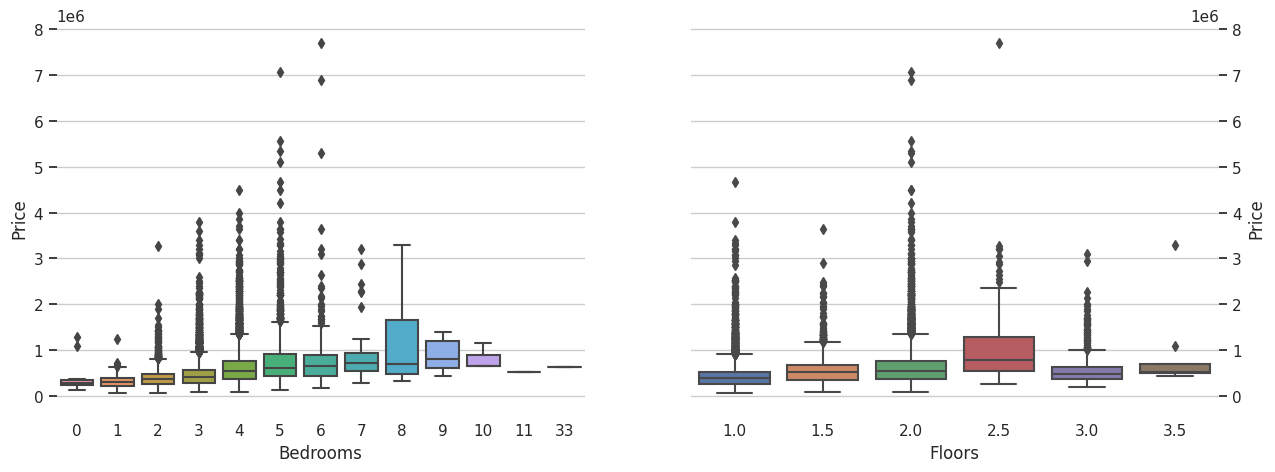

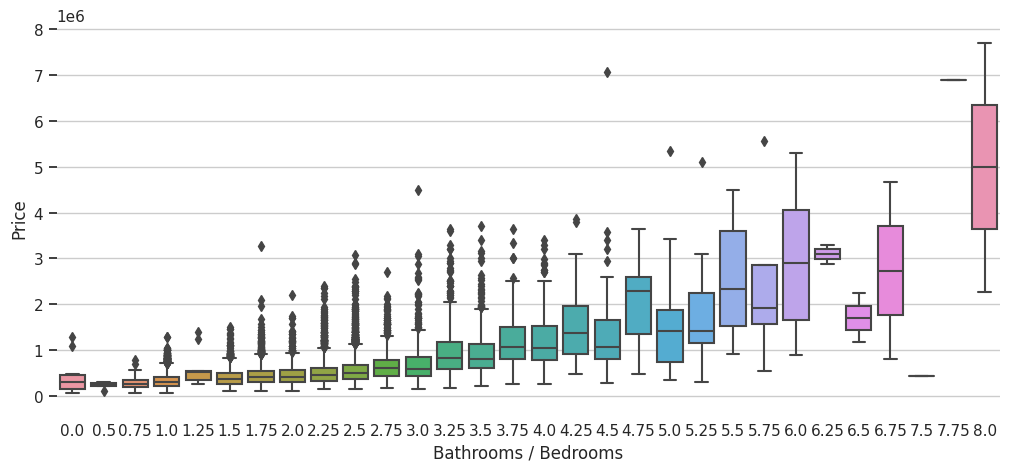

In [26]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house['bedrooms'],y=house['price'], ax=axes[0])
sns.boxplot(x=house['floors'],y=house['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=house['bathrooms'],y=house['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

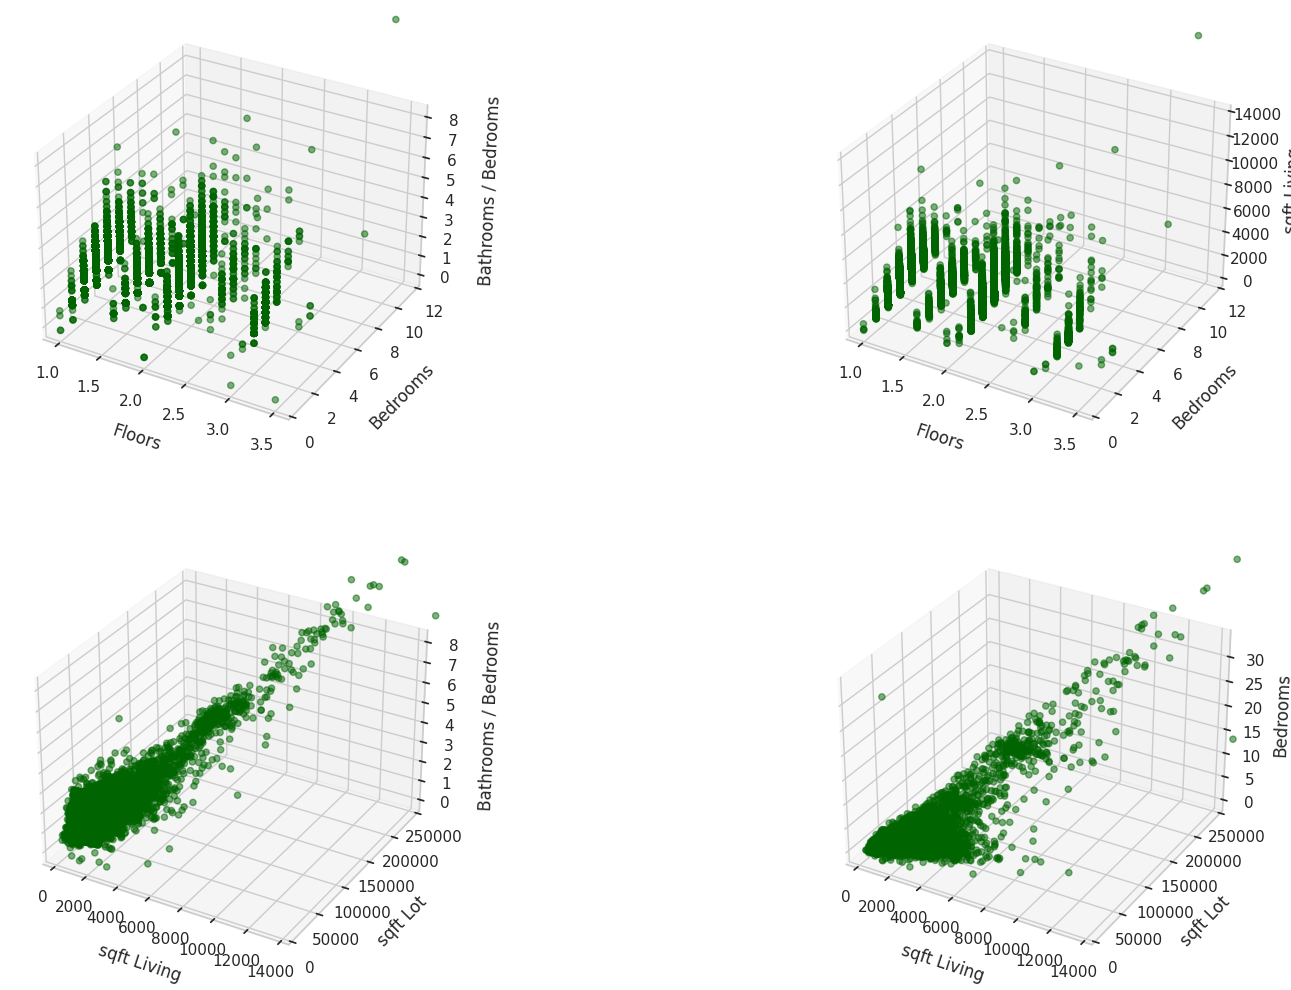

In [27]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(house['floors'],house['bedrooms'],house['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(house['floors'],house['bedrooms'],house['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(house['sqft_living'],house['sqft_lot'],house['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(house['sqft_living'],house['sqft_lot'],house['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

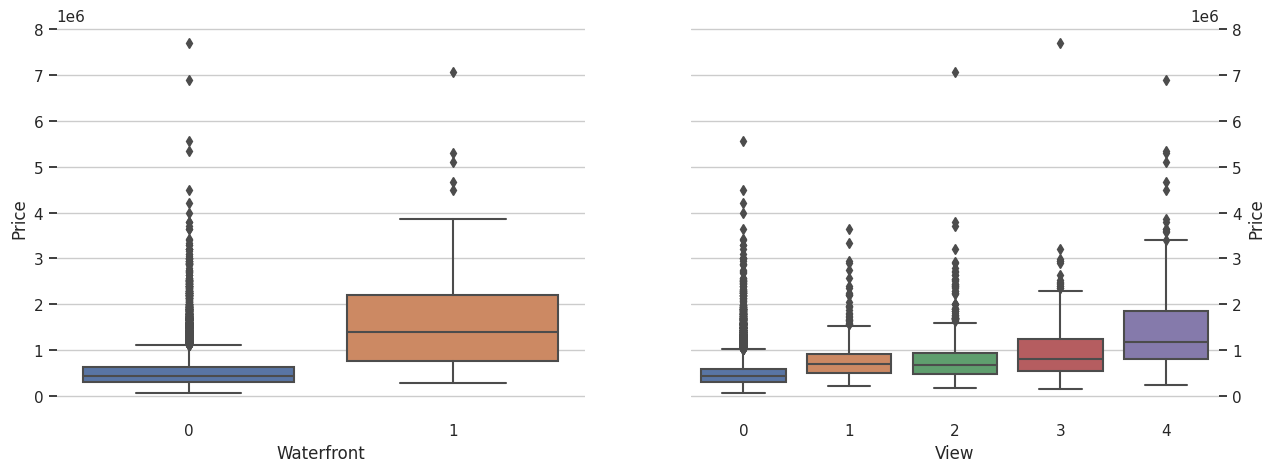

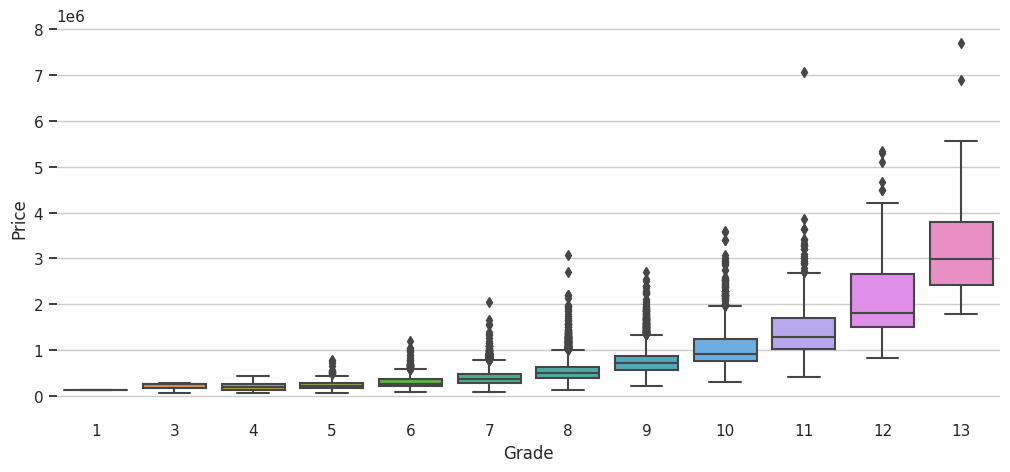

In [28]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house['waterfront'],y=house['price'], ax=axes[0])
sns.boxplot(x=house['view'],y=house['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=house['grade'],y=house['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

Correlations between features and target¶

In [29]:
features = house.iloc[:,3:].columns.tolist()
target = house.iloc[:,2].name
correlations = {}
for f in features:
    data_temp = house[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
    pass
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


Defining a Function to Calculate the Adjusted R2 ¶

In [30]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [31]:
X=house.iloc[:,3:21].values
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [32]:
#y is 1D array
y=house.iloc[:,2].values
y

array([221900, 538000, 180000, ..., 402101, 400000, 325000])

In [33]:
X.shape

(21613, 18)

In [34]:

X.ndim

2

In [35]:

X.size

389034

In [36]:

y.shape

(21613,)

In [37]:
#training Testing 75 %training , 25% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10)

In [38]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [39]:
print(X_train.shape,y_train.shape)

(19451, 18) (19451,)


In [40]:
print(X_train.shape,y_train.shape)

(19451, 18) (19451,)


In [45]:
X_train

array([[-0.39604943, -0.14778432, -0.82301985, ...,  0.35209994,
        -0.56096032, -0.15938035],
       [ 0.6759736 ,  0.50153865,  0.18556876, ...,  0.23840587,
         0.24673061, -0.32413551],
       [ 0.6759736 ,  1.47552309,  1.93162   , ..., -0.39401735,
         1.38563294, -0.11814623],
       ...,
       [ 0.6759736 , -0.79710728, -0.17231752, ...,  0.01101775,
        -0.85149663, -0.0836938 ],
       [ 1.74799663,  1.80018457,  3.67767125, ...,  0.38762933,
         2.34440276,  0.80568667],
       [-0.39604943,  1.80018457,  1.2050024 , ...,  0.79266443,
         1.64711562, -0.11325036]])

In [46]:
model=LinearRegression()

In [47]:
model.fit(X_train,y_train)

LinearRegression()

In [48]:

prediction=model.predict(X_test)

In [49]:

print(prediction)

[506164.87752136 605735.97786979 433669.31349613 ... 427410.11053274
 541636.25612077 572628.71382468]


In [50]:
for i in range (len(prediction)):
    print('Predicted :',prediction[i],' ','Actual :',y_test[i])
    pass

Predicted : 506164.8775213571   Actual : 465000
Predicted : 605735.9778697906   Actual : 400000
Predicted : 433669.31349613477   Actual : 320000
Predicted : 514168.75498325675   Actual : 338500
Predicted : 230801.91551144532   Actual : 324800
Predicted : 731609.1454147131   Actual : 539000
Predicted : 909575.4984034903   Actual : 1175000
Predicted : 1427551.7854045394   Actual : 600000
Predicted : 673647.781997722   Actual : 564950
Predicted : 494319.06959348253   Actual : 571000
Predicted : 255363.44546911184   Actual : 269950
Predicted : 417706.3569005045   Actual : 435000
Predicted : 454298.7911033231   Actual : 377500
Predicted : 696815.0644053177   Actual : 675900
Predicted : 567030.9628427229   Actual : 710000
Predicted : 816625.4590103247   Actual : 760000
Predicted : 296305.544801238   Actual : 325000
Predicted : 375239.5407959868   Actual : 379950
Predicted : 526804.1839693146   Actual : 639000
Predicted : 212110.30557574565   Actual : 257700
Predicted : 815988.7697433976   Ac

In [51]:
acc = model.score(X_test, y_test) # acc stands for accuracy
acc

0.6941191837266145

In [52]:
X_test

array([[ 0.6759736 ,  0.17687716,  0.2831741 , ...,  1.25454656,
        -0.2558972 , -0.01181515],
       [ 0.6759736 ,  0.17687716,  0.36993442, ..., -0.9198524 ,
         0.19443408, -0.18730496],
       [ 0.6759736 ,  0.50153865, -0.17231752, ...,  0.15313533,
         0.45591676, -0.18904571],
       ...,
       [ 0.6759736 ,  0.50153865,  0.57599015, ...,  1.23322893,
         0.70287262, -0.28409816],
       [ 0.6759736 , -0.14778432, -0.46513357, ..., -0.5148173 ,
        -0.48832624, -0.23600981],
       [ 2.82001966,  0.50153865,  1.0640169 , ...,  0.48000576,
         1.02246256,  0.11533246]])

In [53]:
y_test

array([465000, 400000, 320000, ..., 373500, 490000, 400000])

In [54]:
y_train

array([ 256500,  333490, 1500000, ...,  235000,  975000,  795000])

In [55]:
print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))

Average Price for Test Data: 550216.831


In [56]:
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))

Intercept: 538962.3269756627
Coefficient: [-32871.08912435  30279.09666855  82209.31419951   6156.77863546
   3281.48089627  51361.62644994  41997.83976246  16433.93230345
 110821.81483255  77213.72612578  26369.35941434 -75179.92812578
   7980.85272599 -31719.28214494  83498.98113934 -31195.85182355
  15036.20214702 -10896.67570622]


In [57]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,prediction)),'.3f'))
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(model.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(model.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(model.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(model,X,y,cv=5).mean(),'.3f'))

In [58]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression(feauture scaling)','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.7,0.7,0.694,0.692,0.695


In [59]:
#Setting up XGBoost Parameters
xgb = xgboost.XGBRegressor(n_estimators=800, learning_rate=0.05,reg_alpha= 0.1, subsample=0.95,colsample_bytree=1, max_depth=6)


In [60]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [61]:

predictions = xgb.predict(X_test)

In [62]:
print(explained_variance_score(predictions,y_test))

0.8993624579573031


In [63]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predictions)),'.3f'))
rtrsm = float(format(xgb.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(xgb.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(xgb.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(xgb.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(xgb,X,y,cv=5).mean(),'.3f'))

In [64]:
r = evaluation.shape[0]
evaluation.loc[r] = ['XGBoost','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695


In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:

est=GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='squared_error',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)


In [70]:
gradient=est.score(X_test,y_test)
pred = est.predict(X_test)
print(gradient)
print(pred)

0.9053977776268101
[513664.55337114 453518.4354999  318522.82219209 ... 363572.12569101
 481417.62120867 464445.02739787]


In [71]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(est.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(est.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(est.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(est.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(est,X,y,cv=5).mean(),'.3f'))

In [72]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient Boosting Regressor','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Gradient Boosting Regressor,All features,112375.742,0.986,0.986,0.905,0.905,0.896
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695


In [73]:

from sklearn.ensemble import AdaBoostRegressor

In [74]:
ada=AdaBoostRegressor(n_estimators=45, learning_rate=0.2,loss='exponential').fit(X_train, y_train)


In [75]:
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
print(adab)
print(predict)

0.6715755999007171
[543480.56362268 537872.31091096 400900.35884274 ... 502177.79141391
 504202.63766062 549705.36170213]


In [76]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predict)),'.3f'))
rtrsm = float(format(ada.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(ada.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(ada.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(ada.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(ada,X,y,cv=5).mean(),'.3f'))

In [77]:
r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoostRegressor','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Gradient Boosting Regressor,All features,112375.742,0.986,0.986,0.905,0.905,0.896
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695
3,AdaBoostRegressor,All features,209382.129,0.701,0.701,0.672,0.669,0.679


In [78]:
#using the LightGBM algorithm as the model
import lightgbm as lgb
params={'objective':'regression',
        'metric':'mae'}
reg_lgm = lgb.LGBMRegressor(learning_rate=0.05,**params, n_estimators=1000)
reg_lgm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2350
[LightGBM] [Info] Number of data points in the train set: 19451, number of used features: 18
[LightGBM] [Info] Start training from score 538962.326975


LGBMRegressor(learning_rate=0.05, metric='mae', n_estimators=1000,
              objective='regression')

In [79]:
#checking score of the model
reg_lgm.score(X_test,y_test)

0.9011974575946596

In [80]:
#viewing feature importances
reg_lgm.feature_importances_

array([ 718, 1279, 2515, 2250,  301,  188,  638,  415,  960, 2658, 2368,
       2508,  318, 1548, 3347, 3184, 2708, 2097], dtype=int32)

In [81]:
#predicting the test set result
y_pred_lgm=reg_lgm.predict(X_test)

In [82]:
#checking the cross val score of the model
results = cross_val_score(reg_lgm, X_train, y_train, cv=5, n_jobs=-1)
results.mean()

0.8918838263625938

In [83]:
results.std()

0.01441466934337639

In [84]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_lgm)),'.3f'))
rtrsm = float(format(reg_lgm.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg_lgm.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(reg_lgm.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg_lgm.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(reg_lgm,X,y,cv=5).mean(),'.3f'))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2329
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 540438.155639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2329
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 542439.413707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

In [85]:
r = evaluation.shape[0]
evaluation.loc[r] = ['LightGBM','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Gradient Boosting Regressor,All features,112375.742,0.986,0.986,0.905,0.905,0.896
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
4,LightGBM,All features,114843.379,0.977,0.977,0.901,0.900,0.891
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695
3,AdaBoostRegressor,All features,209382.129,0.701,0.701,0.672,0.669,0.679


Polynomial Regression¶

In [87]:
polynomial_reg=PolynomialFeatures(degree=2)
X_train_poly=polynomial_reg.fit_transform(X_train)
X_test_poly=polynomial_reg.fit_transform(X_test)

In [88]:
X_allpoly =polynomial_reg.fit_transform(X)

In [89]:
# polynomial_reg.fit(X_train_poly,y_train)

In [90]:

print(X_train)

[[-0.39604943 -0.14778432 -0.82301985 ...  0.35209994 -0.56096032
  -0.15938035]
 [ 0.6759736   0.50153865  0.18556876 ...  0.23840587  0.24673061
  -0.32413551]
 [ 0.6759736   1.47552309  1.93162    ... -0.39401735  1.38563294
  -0.11814623]
 ...
 [ 0.6759736  -0.79710728 -0.17231752 ...  0.01101775 -0.85149663
  -0.0836938 ]
 [ 1.74799663  1.80018457  3.67767125 ...  0.38762933  2.34440276
   0.80568667]
 [-0.39604943  1.80018457  1.2050024  ...  0.79266443  1.64711562
  -0.11325036]]


In [91]:

print(X_train)

[[-0.39604943 -0.14778432 -0.82301985 ...  0.35209994 -0.56096032
  -0.15938035]
 [ 0.6759736   0.50153865  0.18556876 ...  0.23840587  0.24673061
  -0.32413551]
 [ 0.6759736   1.47552309  1.93162    ... -0.39401735  1.38563294
  -0.11814623]
 ...
 [ 0.6759736  -0.79710728 -0.17231752 ...  0.01101775 -0.85149663
  -0.0836938 ]
 [ 1.74799663  1.80018457  3.67767125 ...  0.38762933  2.34440276
   0.80568667]
 [-0.39604943  1.80018457  1.2050024  ...  0.79266443  1.64711562
  -0.11325036]]


In [92]:
linear_reg2=LinearRegression()
linear_reg2.fit(X_train_poly,y_train)

LinearRegression()

In [93]:
predict_poly=linear_reg2.predict(X_test_poly)
# predict_poly=np.round_(predict_poly)
print(predict_poly)

[428322.421875  533294.1171875 433048.4375    ... 362116.0703125
 484875.09375   511151.       ]


In [95]:

for x in range(len(predict_poly)):
    print("Predict:",int(predict_poly[x]),"Actual:",y_test[x])

Predict: 428322 Actual: 465000
Predict: 533294 Actual: 400000
Predict: 433048 Actual: 320000
Predict: 417969 Actual: 338500
Predict: 306335 Actual: 324800
Predict: 672184 Actual: 539000
Predict: 1022885 Actual: 1175000
Predict: 826257 Actual: 600000
Predict: 629512 Actual: 564950
Predict: 502374 Actual: 571000
Predict: 309962 Actual: 269950
Predict: 342398 Actual: 435000
Predict: 416207 Actual: 377500
Predict: 640721 Actual: 675900
Predict: 524610 Actual: 710000
Predict: 749735 Actual: 760000
Predict: 354442 Actual: 325000
Predict: 341513 Actual: 379950
Predict: 608288 Actual: 639000
Predict: 340297 Actual: 257700
Predict: 666443 Actual: 580000
Predict: 70432 Actual: 330000
Predict: 884911 Actual: 545000
Predict: 466083 Actual: 364000
Predict: 330180 Actual: 222000
Predict: 443232 Actual: 429000
Predict: 709519 Actual: 725000
Predict: 507173 Actual: 379900
Predict: 529193 Actual: 645000
Predict: 1115155 Actual: 1200000
Predict: 264229 Actual: 242000
Predict: 686864 Actual: 795000
Predi

In [96]:
linear_reg2.score(X_test_poly,y_test)

0.8169513156512427

In [97]:
from sklearn.metrics import mean_squared_error
print (np.sqrt(mean_squared_error(y_test,predict_poly)))

156316.63939381696


In [98]:
print('Intercept: {}'.format(linear_reg2.intercept_))
print('Coefficient: {}'.format(linear_reg2.coef_))

Intercept: -49059405813942.805
Coefficient: [ 2.37719366e+11 -4.33261445e+03  1.45426228e+04  2.76662755e+13
  2.17487126e+04 -1.01910915e+04 -5.57152761e+14  7.62834623e+03
  2.42922414e+04  8.82252107e+04 -2.49323985e+13 -1.32465161e+13
 -2.09154774e+04 -7.24838086e+05 -5.14694752e+04  7.72968326e+04
 -5.96012308e+04  4.10171808e+04 -1.84163462e+04  7.87608120e+02
  8.30316741e+02 -5.33880657e+13  1.70207051e+03  1.14810321e+04
 -1.89857825e+03  9.34821787e+02 -2.51444463e+03  2.42458034e+03
  4.81124584e+13  2.55620194e+13 -7.99276446e+03 -3.40856029e+03
  5.09839055e+02 -4.10749609e+03  9.32544141e+03  7.25952148e+03
  1.61408398e+03 -1.23576953e+03 -1.65848984e+14 -1.30684973e+04
 -1.50570469e+04  1.31135938e+03  3.88256250e+03 -3.65980469e+03
  1.02427988e+04  1.49460413e+14  7.94079145e+13  7.10451562e+03
 -6.97541016e+03 -3.30992188e+03  7.92005469e+03 -1.07769922e+04
 -3.61416882e+03  5.40743750e+03  2.11779398e+13 -6.24906417e+12
  2.65704270e+14  1.54960836e+14 -1.61656309e+

In [99]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predict_poly)),'.3f'))
rtrsm = float(format(linear_reg2.score(X_train_poly, y_train),'.3f'))
artrsm = float(format(adjustedR2(linear_reg2.score(X_train_poly,y_train),X_train_poly.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(linear_reg2.score(X_test_poly, y_test),'.3f'))
artesm = float(format(adjustedR2(linear_reg2.score(X_test_poly,y_test),X_test_poly.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(linear_reg2,X_allpoly,house['price'],cv=5).mean(),'.3f'))

In [100]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression(degree 2)','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Gradient Boosting Regressor,All features,112375.742,0.986,0.986,0.905,0.905,0.896
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
4,LightGBM,All features,114843.379,0.977,0.977,0.901,0.900,0.891
5,Polynomial Regression(degree 2),All Features,156316.639,0.831,0.830,0.817,0.815,0.813
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695
3,AdaBoostRegressor,All features,209382.129,0.701,0.701,0.672,0.669,0.679


Lets do some evaluation

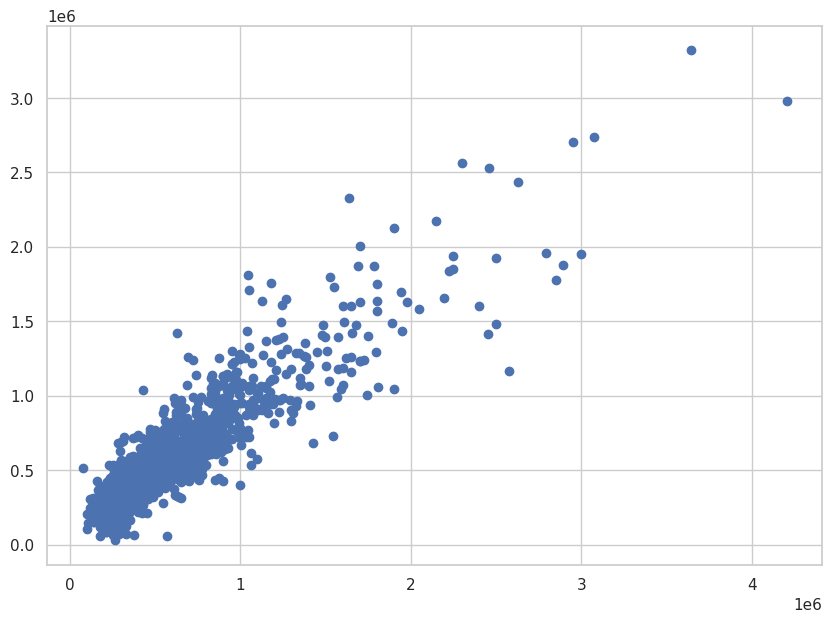

In [101]:
#linear relationship
plt.figure(figsize=(10,7))
plt.scatter(y_test,predict_poly)

In [102]:
print(model.intercept_)
print(linear_reg2.intercept_)

538962.3269756627
-49059405813942.805


In [103]:
print(model.coef_)
print(linear_reg2.coef_)

[-32871.08912435  30279.09666855  82209.31419951   6156.77863546
   3281.48089627  51361.62644994  41997.83976246  16433.93230345
 110821.81483255  77213.72612578  26369.35941434 -75179.92812578
   7980.85272599 -31719.28214494  83498.98113934 -31195.85182355
  15036.20214702 -10896.67570622]
[ 2.37719366e+11 -4.33261445e+03  1.45426228e+04  2.76662755e+13
  2.17487126e+04 -1.01910915e+04 -5.57152761e+14  7.62834623e+03
  2.42922414e+04  8.82252107e+04 -2.49323985e+13 -1.32465161e+13
 -2.09154774e+04 -7.24838086e+05 -5.14694752e+04  7.72968326e+04
 -5.96012308e+04  4.10171808e+04 -1.84163462e+04  7.87608120e+02
  8.30316741e+02 -5.33880657e+13  1.70207051e+03  1.14810321e+04
 -1.89857825e+03  9.34821787e+02 -2.51444463e+03  2.42458034e+03
  4.81124584e+13  2.55620194e+13 -7.99276446e+03 -3.40856029e+03
  5.09839055e+02 -4.10749609e+03  9.32544141e+03  7.25952148e+03
  1.61408398e+03 -1.23576953e+03 -1.65848984e+14 -1.30684973e+04
 -1.50570469e+04  1.31135938e+03  3.88256250e+03 -3.6598

In [104]:
#RMSE
from sklearn import metrics

In [105]:
mean_sq_err=metrics.mean_squared_error(y_test,predict_poly)

In [106]:
RMSE=np.sqrt(mean_sq_err)
RMSE

156316.63939381696

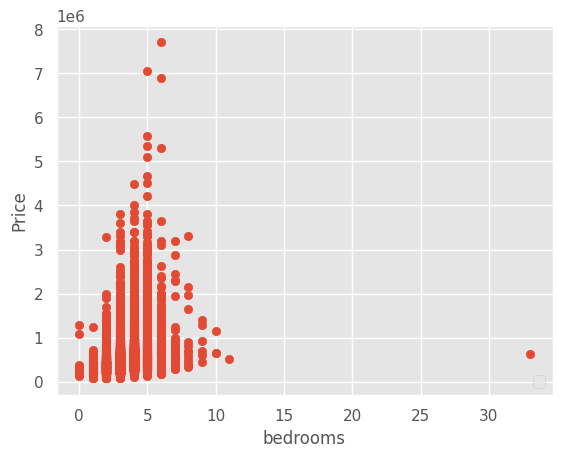

In [107]:
# Drawing and plotting model
plot = "bedrooms"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

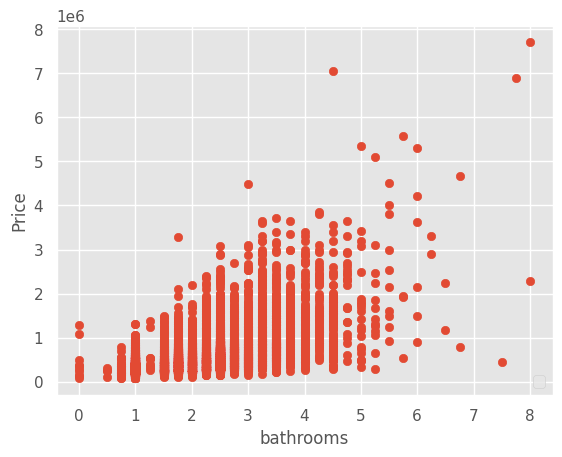

In [108]:
# Drawing and plotting model
plot = "bathrooms"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

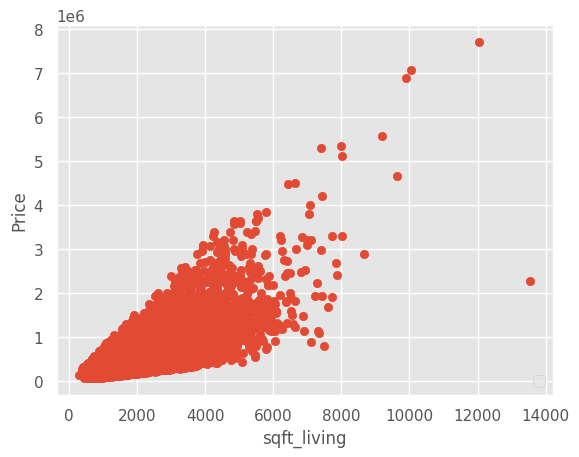

In [109]:
# Drawing and plotting model
plot = "sqft_living"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

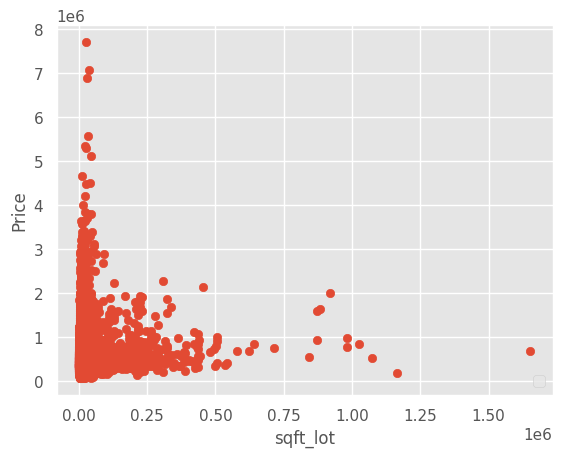

In [110]:
# Drawing and plotting model
plot = "sqft_lot"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

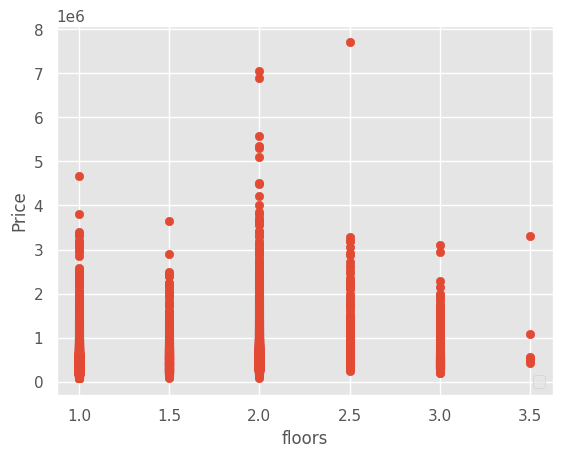

In [111]:
# Drawing and plotting model
plot = "floors"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

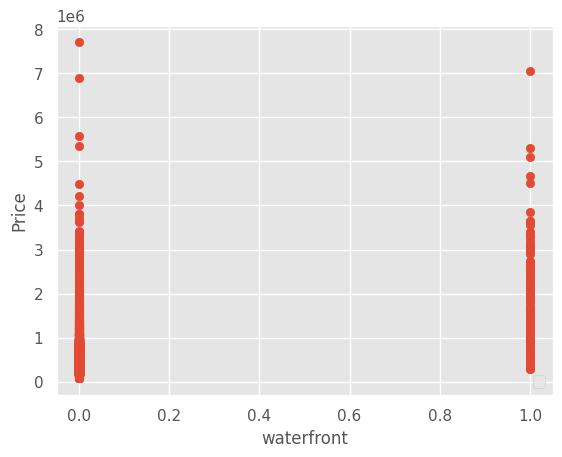

In [112]:
# Drawing and plotting model
plot = "waterfront"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

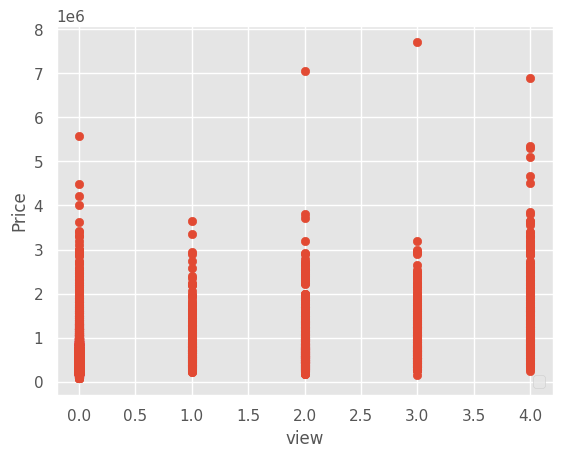

In [113]:
# Drawing and plotting model
plot = "view"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

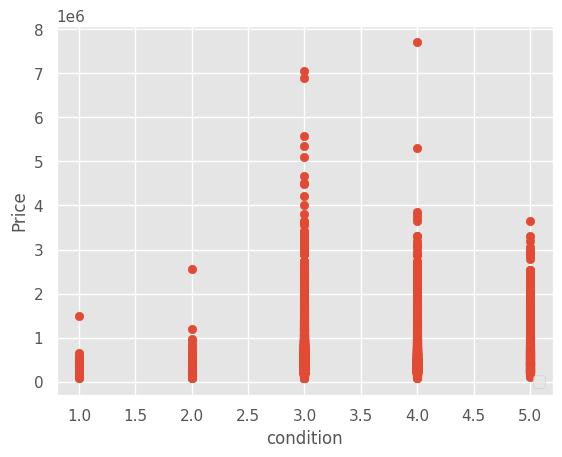

In [114]:
# Drawing and plotting model
plot = "condition"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

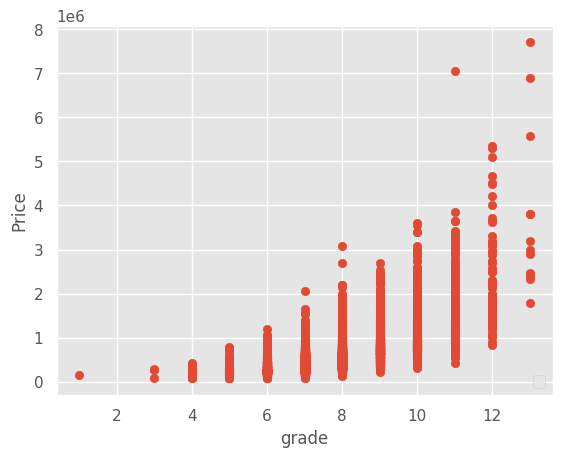

In [115]:
# Drawing and plotting model
plot = "grade"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

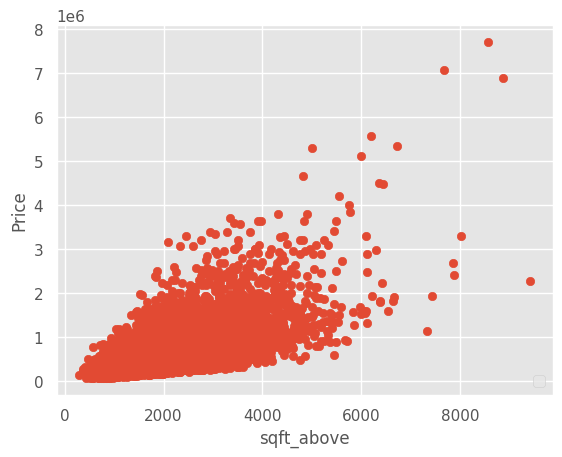

In [116]:
# Drawing and plotting model
plot = "sqft_above"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

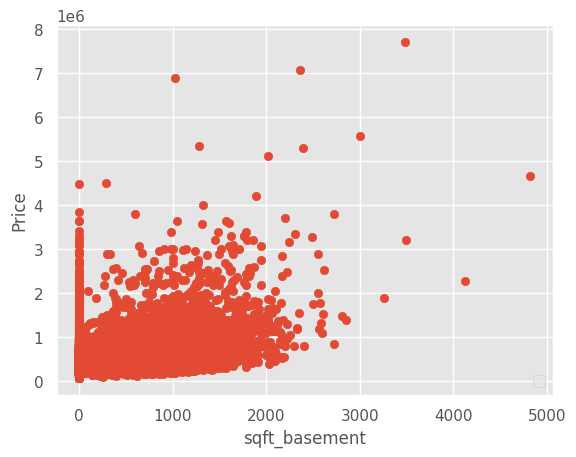

In [117]:
# Drawing and plotting model
plot = "sqft_basement"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

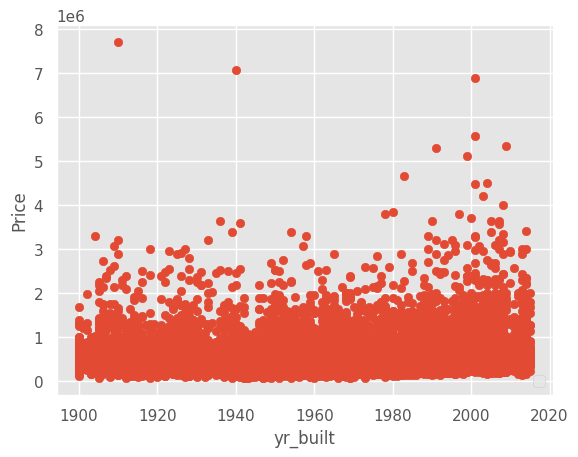

In [118]:
# Drawing and plotting model
plot = "yr_built"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

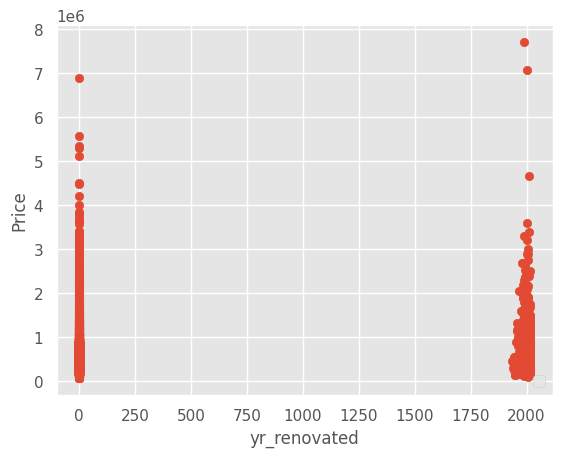

In [119]:
# Drawing and plotting model
plot = "yr_renovated"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

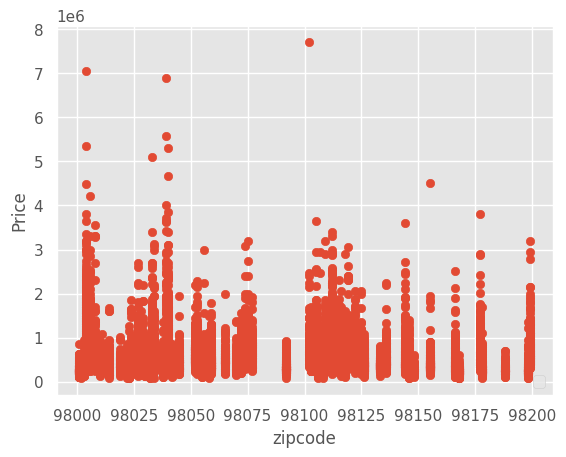

In [120]:
# Drawing and plotting model
plot = "zipcode"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

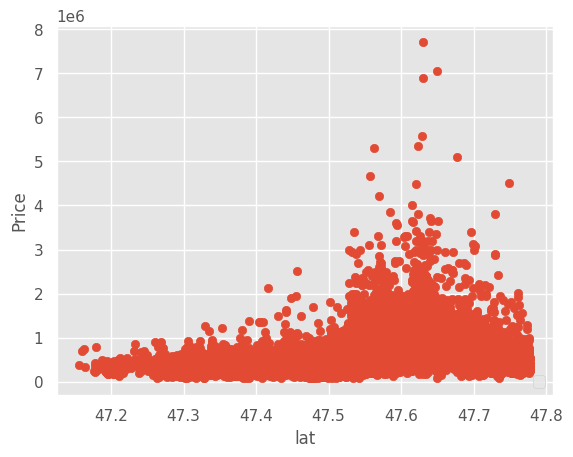

In [121]:
# Drawing and plotting model
plot = "lat"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

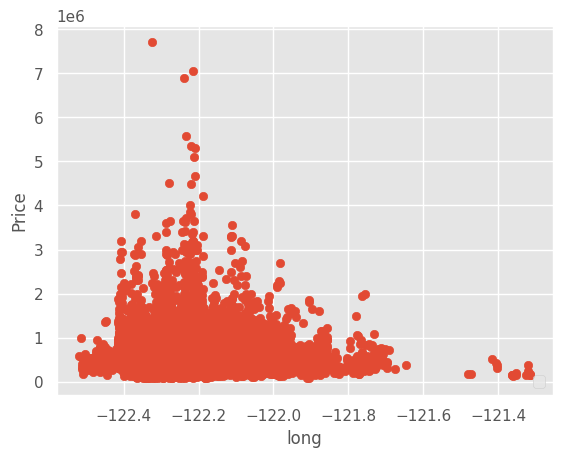

In [122]:
# Drawing and plotting model
plot = "long"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

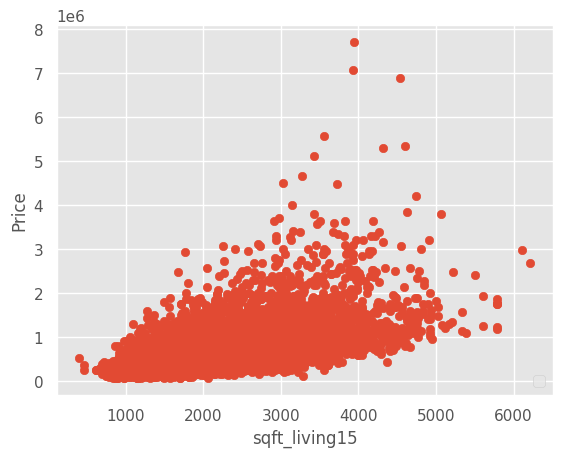

In [123]:
# Drawing and plotting model
plot = "sqft_living15"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

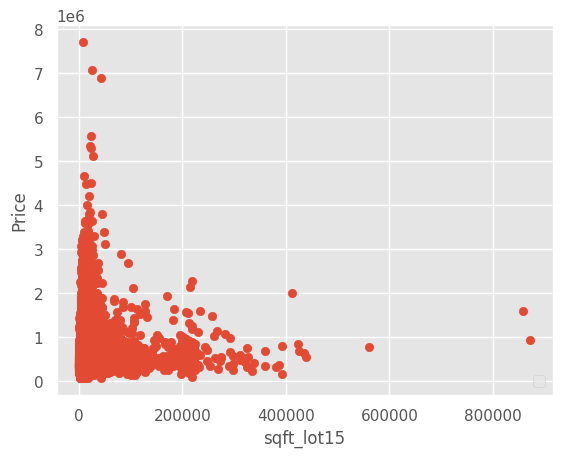

In [124]:
# Drawing and plotting model
plot = "sqft_lot15"
style.use("ggplot")
plt.scatter(house[plot], house["price"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Price")
plt.show()

In [125]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [126]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [128]:
y_pred=reg.predict(X_test)

In [129]:
y_pred

array([490000., 310000., 342000., ..., 337000., 575000., 340000.])

In [130]:
reg.score(X_test,y_test)

0.7466681002564346

In [131]:
for i in range(len(y_test)):
    print("Actual Price:",y_test[i],"Predicted Price:",y_pred[i])

Actual Price: 465000 Predicted Price: 490000.0
Actual Price: 400000 Predicted Price: 310000.0
Actual Price: 320000 Predicted Price: 342000.0
Actual Price: 338500 Predicted Price: 335000.0
Actual Price: 324800 Predicted Price: 270000.0
Actual Price: 539000 Predicted Price: 612500.0
Actual Price: 1175000 Predicted Price: 875000.0
Actual Price: 600000 Predicted Price: 649000.0
Actual Price: 564950 Predicted Price: 550000.0
Actual Price: 571000 Predicted Price: 567500.0
Actual Price: 269950 Predicted Price: 358000.0
Actual Price: 435000 Predicted Price: 455000.0
Actual Price: 377500 Predicted Price: 359950.0
Actual Price: 675900 Predicted Price: 588000.0
Actual Price: 710000 Predicted Price: 730000.0
Actual Price: 760000 Predicted Price: 718500.0
Actual Price: 325000 Predicted Price: 355000.0
Actual Price: 379950 Predicted Price: 358500.0
Actual Price: 639000 Predicted Price: 629000.0
Actual Price: 257700 Predicted Price: 250000.0
Actual Price: 580000 Predicted Price: 699000.0
Actual Price

In [132]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(reg.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(reg.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(reg,X,y,cv=5).mean(),'.3f'))

In [133]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree regression','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Gradient Boosting Regressor,All features,112375.742,0.986,0.986,0.905,0.905,0.896
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
4,LightGBM,All features,114843.379,0.977,0.977,0.901,0.900,0.891
5,Polynomial Regression(degree 2),All Features,156316.639,0.831,0.830,0.817,0.815,0.813
6,Decision Tree regression,All Features,183893.697,0.999,0.999,0.747,0.745,0.755
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695
3,AdaBoostRegressor,All features,209382.129,0.701,0.701,0.672,0.669,0.679


Random Forest Regression

In [134]:

reg=RandomForestRegressor(n_estimators=400)
reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=400)

In [135]:
y_pred=reg.predict(X_test)

In [136]:
y_pred

array([538866.76583333, 441346.90833333, 325844.0025    , ...,
       347021.6675    , 452257.98666667, 493291.98      ])

In [137]:

reg.score(X_test,y_test)

0.8803769376337616

In [138]:
for i in range(len(y_test)):
    print("Actual Price:",y_test[i],"Predicted Price:",y_pred[i])

Actual Price: 465000 Predicted Price: 538866.7658333334
Actual Price: 400000 Predicted Price: 441346.9083333334
Actual Price: 320000 Predicted Price: 325844.0025
Actual Price: 338500 Predicted Price: 344453.43
Actual Price: 324800 Predicted Price: 292617.67
Actual Price: 539000 Predicted Price: 559134.25
Actual Price: 1175000 Predicted Price: 988173.7725
Actual Price: 600000 Predicted Price: 632404.155
Actual Price: 564950 Predicted Price: 503924.6125
Actual Price: 571000 Predicted Price: 575592.7525
Actual Price: 269950 Predicted Price: 286685.2558333333
Actual Price: 435000 Predicted Price: 438906.875
Actual Price: 377500 Predicted Price: 395348.8525
Actual Price: 675900 Predicted Price: 531128.095
Actual Price: 710000 Predicted Price: 712072.6575
Actual Price: 760000 Predicted Price: 788827.625
Actual Price: 325000 Predicted Price: 333003.15
Actual Price: 379950 Predicted Price: 356872.0791666667
Actual Price: 639000 Predicted Price: 579528.945
Actual Price: 257700 Predicted Price: 

In [139]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(reg.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(reg.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(reg,X,y,cv=5).mean(),'.3f'))

In [140]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest Regression','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Gradient Boosting Regressor,All features,112375.742,0.986,0.986,0.905,0.905,0.896
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
4,LightGBM,All features,114843.379,0.977,0.977,0.901,0.900,0.891
7,Random Forest Regression,All Features,126365.745,0.983,0.983,0.880,0.879,0.878
5,Polynomial Regression(degree 2),All Features,156316.639,0.831,0.830,0.817,0.815,0.813
6,Decision Tree regression,All Features,183893.697,0.999,0.999,0.747,0.745,0.755
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695
3,AdaBoostRegressor,All features,209382.129,0.701,0.701,0.672,0.669,0.679


In [141]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=True)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,AdaBoostRegressor,All features,209382.129,0.701,0.701,0.672,0.669,0.679
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695
6,Decision Tree regression,All Features,183893.697,0.999,0.999,0.747,0.745,0.755
5,Polynomial Regression(degree 2),All Features,156316.639,0.831,0.830,0.817,0.815,0.813
7,Random Forest Regression,All Features,126365.745,0.983,0.983,0.880,0.879,0.878
4,LightGBM,All features,114843.379,0.977,0.977,0.901,0.900,0.891
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
2,Gradient Boosting Regressor,All features,112375.742,0.986,0.986,0.905,0.905,0.896


In [142]:
from sklearn.neighbors import KNeighborsRegressor

In [143]:

classifier=KNeighborsRegressor(n_neighbors=5)

In [144]:
classifier.fit(X_train,y_train)

KNeighborsRegressor()

In [145]:
y_pred=classifier.predict(X_test)

In [146]:
y_pred

array([530760.4, 502200. , 352500. , ..., 349370. , 572900. , 335000. ])

In [147]:
classifier.score(X_test,y_test)

0.8003884650028733

In [148]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(classifier.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(classifier.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(classifier.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(classifier.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(classifier,X,y,cv=5).mean(),'.3f'))

In [149]:

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN(neighbhors=5)','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Gradient Boosting Regressor,All features,112375.742,0.986,0.986,0.905,0.905,0.896
1,XGBoost,All features,108593.344,0.982,0.982,0.912,0.911,0.895
4,LightGBM,All features,114843.379,0.977,0.977,0.901,0.900,0.891
7,Random Forest Regression,All Features,126365.745,0.983,0.983,0.880,0.879,0.878
5,Polynomial Regression(degree 2),All Features,156316.639,0.831,0.830,0.817,0.815,0.813
6,Decision Tree regression,All Features,183893.697,0.999,0.999,0.747,0.745,0.755
0,Multiple Linear Regression(feauture scaling),All features,202068.224,0.700,0.700,0.694,0.692,0.695
3,AdaBoostRegressor,All features,209382.129,0.701,0.701,0.672,0.669,0.679
8,KNN(neighbhors=5),All Features,163235.540,0.869,0.869,0.800,0.799,0.493
